In [1]:
# import the libraries
from PIL import Image
from transformers import AutoModelForCausalLM, AutoTokenizer

In [2]:
# load the model and tokenizer
model_path = "/data1/pengrui/Project/MySa2VA/work_dirs/sa2va_1b/hf-sa2va-1b-iter375568"
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    torch_dtype="auto",
    device_map='cuda:0',
    trust_remote_code=True
).eval()

tokenizer = AutoTokenizer.from_pretrained(
    model_path,
    trust_remote_code=True
)

/home/pengrui/miniconda3/envs/sa2va/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
`torch_dtype` is deprecated! Use `dtype` instead!


In [3]:
# Let's write some image and video IO functions
from third_parts import VideoReader
import matplotlib.pyplot as plt

def read_video(video_path, video_interval):
    vid_frames = VideoReader(video_path)[::video_interval]
    for frame_idx in range(len(vid_frames)):
        frame_image = vid_frames[frame_idx]
        frame_image = frame_image[..., ::-1]  # BGR (opencv system) to RGB (numpy system)
        frame_image = Image.fromarray(frame_image)
        vid_frames[frame_idx] = frame_image
    return vid_frames

def show_img(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [4]:
# Then read the video
VID_PATH = 'assets/videos/gf_exp1.mp4'
vid_frames = read_video(VID_PATH, video_interval=6)

# create a question (<image> is a placeholder for the video frames)
question = "<image>What is the atmosphere of the scene?"
result = model.predict_forward(
    video=vid_frames,
    text=question,
    tokenizer=tokenizer,
)
print(result['prediction'])

`generation_config` default values have been modified to match model-specific defaults: {'bos_token_id': 151643}. If this is not desired, please set these values explicitly.


The atmosphere of the scene is dark and moody, with a sense of tension and anticipation. The dim lighting and the presence of multiple people in suits and ties suggest a formal or professional setting. The man in the chair appears to be the focal point of the scene, with the other individuals surrounding him, creating a sense of interaction and engagement. The overall ambiance conveys a sense of drama and intrigue, as the viewer is left to wonder about the context and story behind the scene.<|im_end|>


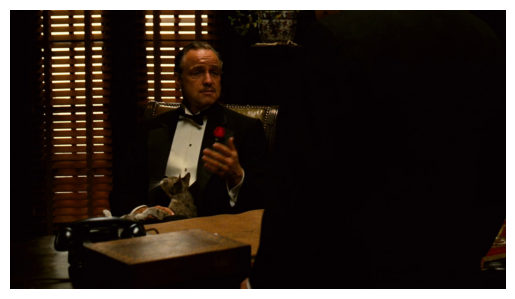

In [5]:
# Let's choose an image and ask the model some question.
image_idx = 60
image = vid_frames[image_idx]
question = "<image>Can you describe what this man holding the cat is doing and how he feels?"

show_img(image)

In [6]:
result = model.predict_forward(
    image=image,
    text=question,
    tokenizer=tokenizer,
)
print(result['prediction'])

The man holding the cat is sitting in a chair, wearing a tuxedo and a bow tie. He appears to be deep in thought, as he gazes off into the distance. The cat, with its curious and playful demeanor, seems to be accompanying him in this moment of contemplation. The man's expression and the cat's presence create a sense of intimacy and connection between them.<|im_end|>


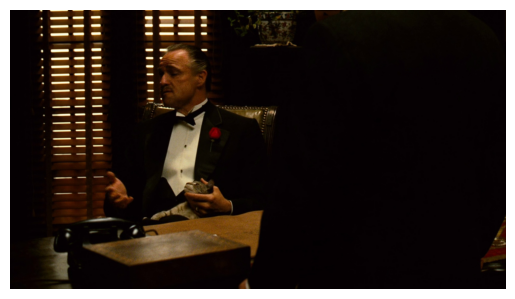

In [7]:
# Let's choose another image and ask the same question.
image_idx = 95
image = vid_frames[image_idx]
question = "<image>Can you describe what this man holding the cat is doing and how he feels?"

show_img(image)

In [8]:
result = model.predict_forward(
    image=image,
    text=question,
    tokenizer=tokenizer,
)
print(result['prediction'])

The man holding the cat appears to be in a formal setting, possibly a restaurant or a club, as he is wearing a tuxedo. He is sitting in a chair and holding a cat in his lap. His expression suggests that he is feeling somewhat displeased or annoyed. It is possible that he is dealing with an unexpected situation or someone who has upset him.<|im_end|>
